<a href="https://colab.research.google.com/github/yuritpinheiro/Presentations/blob/master/pratica_teda/Pr%C3%A1tica_TEDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TEDA



## Excentricidade
$
\begin{align}
    \xi_{n} = \frac{1}{n} + \frac{||x_{n} - \mu_{n}||^{2}}{n \sigma_{n}^{2}}
\end{align}
$



### Variância
$
\begin{align}
    \sigma_{n}^{2} = X_n - ||\mu_n||^2
\end{align}
$



### Média recursiva
$
\begin{align}
    \mu_{n} = \frac{n - 1}{n}\mu_{n - 1} + \frac{1}{n}x_{n}
\end{align}
$



### Média quadrática recursiva
$
\begin{align}
    X_{n} = \frac{n - 1}{n}X_{n - 1} + \frac{1}{n}||x_{n}||^2
\end{align}
$



### Excentricidade normalizada

$
\begin{align}
    \zeta_{n} = \frac{\xi}{2}
\end{align}
$



### Condição de atipicalidade:

$
\begin{align}
    \zeta_{n} > \frac{m^2 + 1}{2n}
\end{align}
$

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
# Setup
plt.rcParams['figure.figsize'] = (12, 6)
# plt.rcParams['']

In [ ]:
class TEDA:
    def __init__(self, m):
        self.m = m
        self.n = 0
        self.mean = 0
        self.sq_mean = 0
    
    def _norm(self, x):
        return np.sum(x ** 2)

    def threshold(self):
        return ((self.m ** 2) + 1) / (2 * self.n)
        
    def is_typical(self, normalized_eccentricity):
        return normalized_eccentricity <= self.threshold()

    def get_eccentricity(self, x):
        return (1 / self.n) + (self._norm(x - self.mean))/(self.n * (self.sq_mean - self._norm(self.mean)))

    def update(self, x):
        self.n += 1
        self.mean = ((self.n-1) * self.mean + x)/self.n
        self.sq_mean = ((self.n-1) * self.sq_mean + self._norm(x))/self.n

    def __str__(self):
        return "%d %f %f" % (self.n, self.mean, self.sq_mean)

    def __repr__(self):
        return "n: %d\nmédia: %f\nmédia quadratica: %f\nlimiar: %f" % (self.n, self.mean, self.sq_mean, self.threshold())

## Detecção de outilier

In [ ]:
typical_data = np.random.normal(0, 1, 1000)
atypical_data = np.random.normal(10, 1, 10)
data = np.concatenate([typical_data, atypical_data])
np.random.shuffle(data)

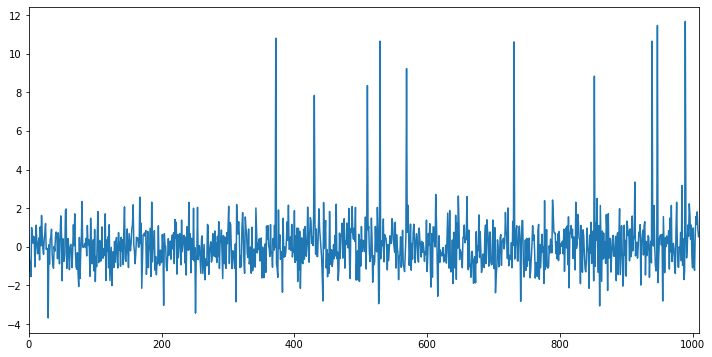

In [ ]:
plt.plot(data)
plt.xlim(0, data.size -1)
plt.show()

In [ ]:
t = TEDA(3)

for d in data:
    t.update(d)

t

n: 1010
média: 0.088686
média quadratica: 2.029170
limiar: 0.004950

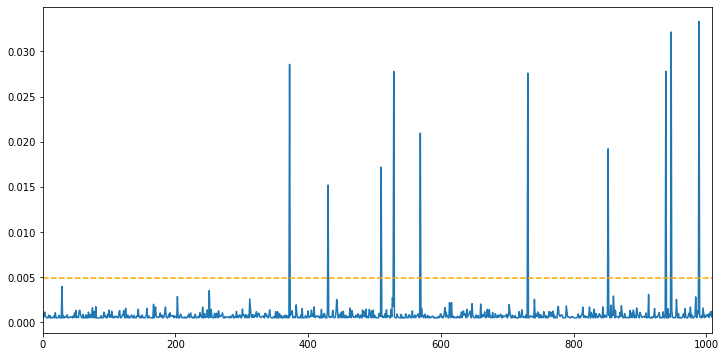

In [ ]:
eccentricity = np.array([ t.get_eccentricity(d) for d in data ])

plt.plot(eccentricity / 2)
plt.xlim(0, data.size -1)
plt.axhline(t.threshold(), ls="--", c="orange")
plt.show()

## Detcção de outliers online

In [ ]:
t = TEDA(3)

t.update(data[0])
t.update(data[1])

eccentricity_list = []
threshold_list = []

for d in data[2:]:
    eccentricity = t.get_eccentricity(d)
    eccentricity_list.append(eccentricity/2)
    threshold_list.append(t.threshold())
    if t.is_typical(eccentricity / 2):
        t.update(d)

t

n: 991
média: 0.004821
média quadratica: 0.951048
limiar: 0.005045

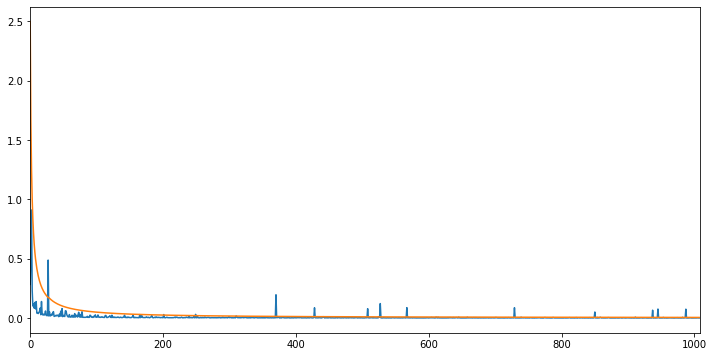

In [ ]:
eccentricity_array = np.array(eccentricity_list)
threshold_array = np.array(threshold_list)

plt.plot(eccentricity_array)
plt.plot(threshold_array)
plt.xlim(0, eccentricity_array.size)
plt.show()

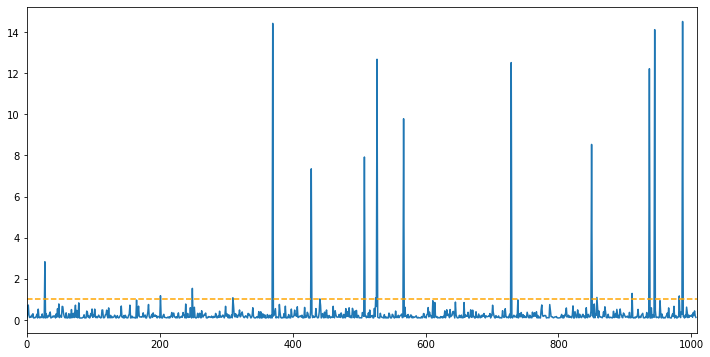

In [ ]:
eccentricity_array = np.array(eccentricity_list)
threshold_array = np.array(threshold_list)

plt.plot(eccentricity_array/threshold_array)
plt.xlim(0, eccentricity_array.size)
plt.axhline(1, ls="--", c="orange")
plt.show()